# Lecture 6

Using partial differentiation, we showed in the lecture that for the implicit representation of a line

$$
f(x, y) = c,
$$

where $f$ is and function and $c$ is constant, the gradient $\nabla f$  on the line is perpendicular to the line. We demonstrate this here for an ellipse.

## Equation of an ellipse

The implicit equation of an ellipse is 

$$
\frac{x^{2}}{a^{2}} + \frac{y^{2}}{b^{2}} = 1
$$

where $a \ne 0$ and $b \ne 0$. The parametric representation of a ellipse is

$$
\begin{align}
    x(s) &= a \cos s
    \\
    y(s) &= b \sin s
\end{align}
$$

We can plot the parametric function with SymPy:

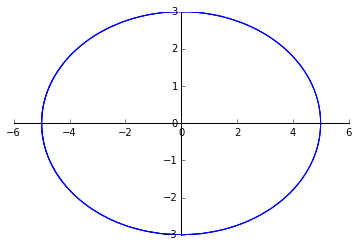

In [1]:
from sympy import *
init_printing()
from IPython.display import display
from sympy.plotting import plot_parametric

# This command makes plots appear inside the browser window
%matplotlib inline

# Create independent variable and function for x and y
s = Symbol('s')
xs = Function('xs')
ys = Function('ys')

# Pick concrete values for a and b
a = 5
b = 3

# Parametric representation of ellipse
xs = a*cos(s)
ys = b*sin(s)

# Plot parametric line
plot_parametric(xs, ys)

## Tangent to the line

The tangent vector $\boldsymbol{t}$ to the surface is given by

$$
\boldsymbol{t} = \frac{d x}{d s} \boldsymbol{e}_{1}
 + \frac{d y}{d s} \boldsymbol{e}_{2}
$$

We can compute the tangent vector via differentiation, and plot the tangent at a given point.

In [2]:
t = (diff(xs, s), diff(ys, s))

The normal direction to the surface is given by $\nabla f$ 

$$
\nabla f = \frac{\partial f}{\partial x} \boldsymbol{e}_{1} + \frac{\partial f}{\partial y} \boldsymbol{e}_{2}
$$

evaluated at a point on the surface.

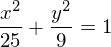

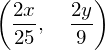

In [3]:
x, y = symbols('x y')
f = Eq(x**2/a**2 + y**2/b**2, 1)
display(f)
grad_f = (diff(f.args[0], x), diff(f.args[0], y))
display(grad_f)

We will now plot the ellipse, and the tangent vector $\boldsymbol{t}$ and the normal $\boldsymbol{n} = \nabla f$ to the surface at a point $(x(s_{0}), y(s_{0}))$. For later visualisaton, we will scale the vectors dependent on the size of the the ellipse.

In [4]:
# Pick point to evaluate tangent and normal vector at
s0 = 0.4
x0, y0 = xs.subs(s, s0), ys.subs(s, s0)

# Evaluate tangent and normal vector, and scale according to ellipse major axis length 
t0 = (t[0].subs(s, s0), t[1].subs(s, s0))
l = sqrt(t0[0]**2 + t0[1]**2)/max(a, b)
t0 = (t0[0]/l, t0[1]/l)

n0 = (grad_f[0].subs(x, x0).subs(y, y0), grad_f[1].subs(x, x0).subs(y, y0))
l = sqrt(n0[0]**2 + n0[1]**2)/max(a, b)
n0 = (n0[0]/l, n0[1]/l)

We will now plot the ellipse, as well as the tangent and normal vectors at the point $(x(s_{0}), y(s_{0}))$.

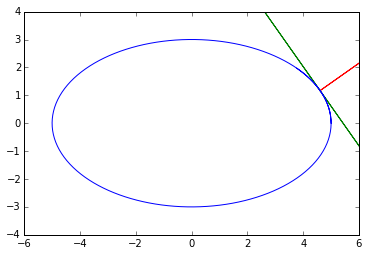

In [5]:
from sympy.utilities.lambdify import lambdify
import numpy as np
import matplotlib.pyplot as plt

# Set plot limits (based on ellipse size)
plt.xlim(-(a + 1), a + 1)
plt.ylim(-(b + 1), b + 1)

# Make plot aspect ratio equal -> normal lines appear normal
ax = plt.axes()
ax.set_aspect('equal')

# Prepare the symbolix expression for x(s) and y(s) for plotting
xs = lambdify(s, xs, modules=['numpy'])
ys = lambdify(s, ys, modules=['numpy'])

# Plot ellipse
s = np.linspace(0, 7, 300)
plt.plot(xs(s), ys(s))

# Add tangent vector to plot
ax.arrow(x0, y0,  float(t0[0]),  float(t0[1]), label='tangent', color='g')
ax.arrow(x0, y0, -float(t0[0]), -float(t0[1]), color='g')

# Add normal vector to splot
ax.arrow(x0, y0,  float(n0[0]),  float(n0[1]), label='normal', color='r')

# Show plot
plt.show()

It can be seen from the plot that the gradient (red line) is normal to the ellipse.